In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
bankdf= pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')
bankdf.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [3]:
bankdf.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [4]:
bankdf.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
bankdf.corr()

In [5]:
#grouping by income
incomebygrop = bankdf.groupby(by=['Income'])
avg=incomebygrop.mean()

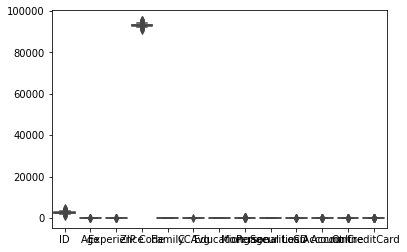

In [6]:
sns.boxplot(data=avg)

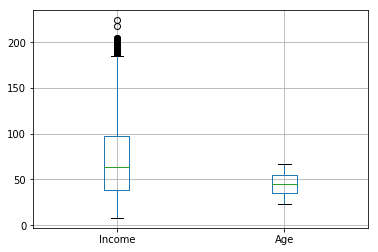

In [7]:
#bankdf.groupby('Income').hist(alpha=0.4)
#bankdf.plot(kind='bar')
bankdf.boxplot(column=['Income', 'Age'])

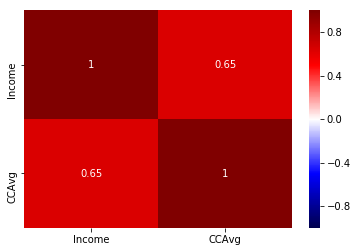

In [8]:
#analyziing Income vs Credit CArd Spending , we can find a poisitve correlecation between them.
sns.heatmap(bankdf[['Income','CCAvg']].corr(),annot=True,vmin=-1,vmax=1,cmap='seismic')

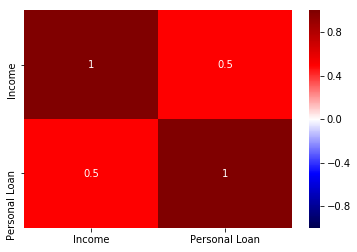

In [9]:
sns.heatmap(bankdf[['Income','Personal Loan']].corr(),annot=True,vmin=-1,vmax=1,cmap='seismic')

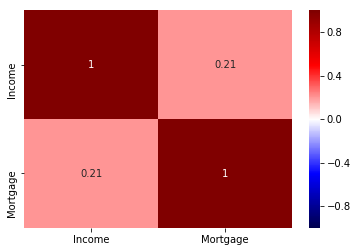

In [10]:
#Analyzing independent variable Mortgage
sns.heatmap(bankdf[['Income','Mortgage']].corr(),annot=True,vmin=-1,vmax=1,cmap='seismic')

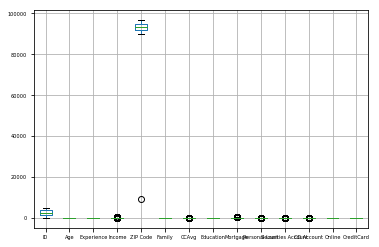

In [11]:
bankdf.boxplot(fontsize='5')

In [12]:
#scatter_matrix(bankdf, alpha=0.2, figsize=(6, 6), diagonal='kde')
#Anyzing the whole dataset using Pairplot for Further analysis betweent he variables.
#sns.pairplot(bankdf)

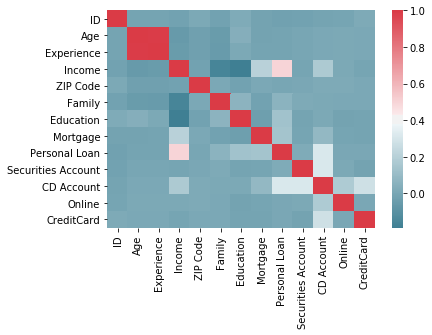

In [13]:
# Trying to find the Correlatin matrix for each varibles inthe df.
corr = bankdf.loc[:,bankdf.dtypes == 'int64'].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))

In [14]:
# From the Analysis of these plots we can find that with Age, Expericne and Education level the income increses.
# An advanced Professional ears more income as a reusult his Credit CArd spending is higher and his Mortguage is also higer.

In [15]:
# We can infer that higer earning person takes Loan offered by the bank and becomes a Asset Customer which improves bank's revenue. 

In [16]:
# Hence the Higer income person is likely to take the loan when offered by the Bank.

In [17]:
# Splitting the data into sets for train and testing.
y1 = bankdf['Personal Loan']
x1 = bankdf[['Income','CCAvg','Mortgage']]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x1,y1,test_size=0.30, 
                                                    random_state=101)

In [19]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
model = logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [20]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

In [21]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.93      0.97      0.95      1354
          1       0.55      0.29      0.38       146

avg / total       0.89      0.91      0.89      1500



In [22]:
#Confusion Matrix Y var vs X variable.
confusion_matrix(y_test,predictions)
#Accuracy_Score(ytest,Predicted)

array([[1319,   35],
       [ 104,   42]])

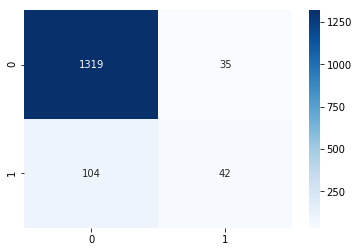

In [23]:
sns.heatmap(confusion_matrix(y_test,predictions), annot=True, cmap='Blues',fmt='g')

In [24]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score

In [25]:
NNH = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')

In [26]:
bankdf.shape
bankdf.info()
def getAccuracy(testSet, predictions):
	correct = 0
	for x in range(len(testSet)):
		if testSet[x][-1] is predictions[x]:
			correct += 1
	return (correct/float(len(testSet))) * 100.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
knncleandf=bankdf
knnBankdf = knncleandf.drop(labels= "ID" , axis = 1)

In [27]:
#fitting the training and testing varibales into the model
NNH.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=21, p=2,
           weights='uniform')

In [34]:
#predictlabels = NNH.predict(X_test)

In [35]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point
predicted_labels = NNH.predict(X_test)
predicted_labels

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predicted_labels)

0.91

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predicted_labels)

array([[1326,   28],
       [ 107,   39]])

In [38]:
from sklearn.naive_bayes import GaussianNB

In [39]:
#Build model using Guissian Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None)

In [40]:
# predict
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

             precision    recall  f1-score   support

          0       0.95      0.93      0.94      1354
          1       0.45      0.56      0.50       146

avg / total       0.90      0.89      0.90      1500

[[1254  100]
 [  64   82]]


In [41]:
#calc the score
accuracy_score(y_test, predicted)

0.8906666666666667

In [ ]:
# Of the three models Logistic , KNN and Naive Bayes so far my accuracy for the KNN model is higher.